In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
"""
Assign ranks to Quality Sore :- 

1 - 6 = Rank 2 (Bad Quality)
7 - 10 = Rank 1 (Good Quality) 
"""

rank = list()

for quality in df['quality']:
    if 1 <= quality <= 6:
        rank.append(2)
    elif 7 <= quality <= 10:
        rank.append(1)
        
df['Rank'] = rank

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [8]:
df['Rank'].value_counts()

2    1382
1     217
Name: Rank, dtype: int64

In [9]:
X = df.iloc[:, :-2].values
Y = df['Rank'].values

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=0) 

In [11]:
# <<---  Scale the features --->>

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

## PCA

In [12]:
# <<--- Check Clusters by PCA --->>

In [13]:
# Apply LDA on both Train and test Set

from sklearn.decomposition import PCA

temp_x_train = x_train
temp_x_test = x_test
temp_y_train = y_train
temp_y_test = y_test

pca = PCA()  
pca.fit(temp_x_train)
temp_x_train = pca.transform(temp_x_train)
temp_x_test = pca.transform(temp_x_test)

In [14]:
pca_percentage = pca.explained_variance_ratio_ * 100  
pca_percentage

array([28.27573302, 18.10085161, 13.47452678, 10.85072054,  8.73467701,
        5.96939696,  5.31285158,  3.99510783,  3.09731375,  1.64844285,
        0.54037808])

[Text(0, 0.5, 'Percentage(%)'),
 Text(0.5, 0, 'PCA'),
 Text(0.5, 1.0, 'PCA plot')]

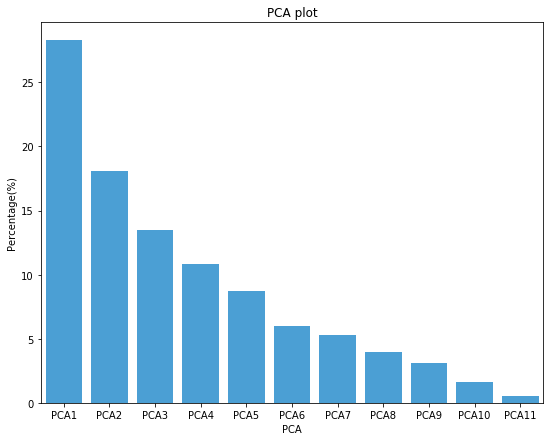

In [15]:
PCA =['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11']

# PLot the data

plt.rcParams["figure.figsize"] = (9, 7)

ax = sns.barplot(x=PCA, y= pca_percentage, color='#34a4eb')

ax.set(xlabel='PCA', ylabel='Percentage(%)', title='PCA plot')

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Select only first 2 PCA's 
pca.fit(temp_x_train)
temp_x_train = pca.transform(temp_x_train)
temp_x_test = pca.transform(temp_x_test)

In [17]:
pca_1 = temp_x_train[:, 0]
pca_2 = temp_x_train[:, 1]
customer_segment = temp_y_train

In [18]:
final_df = pd.DataFrame(data=zip(pca_1, pca_2, customer_segment), index=range(0, len(customer_segment)), 
                        columns=['PCA 1', 'PCA 2', 'Rank'])

final_df.head()

,PCA 1,PCA 2,Rank
0,-0.109876,0.783217,2
1,-0.219885,0.592878,2
2,-0.461790,-0.192626,2
3,-2.189943,0.238586,2
4,0.751735,1.023003,2


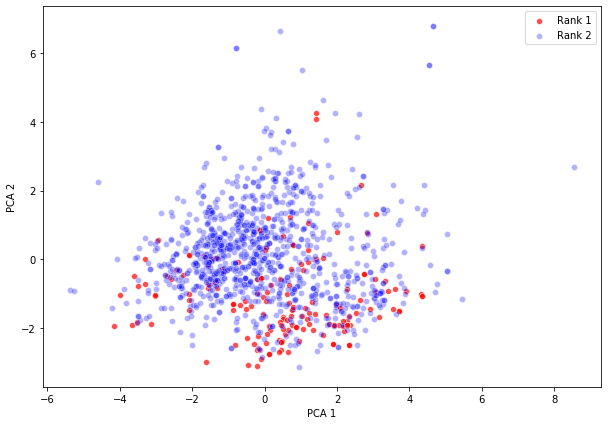

In [19]:
# Plot the data of all the 3 classes

plt.rcParams["figure.figsize"] = (10, 7)

sns.scatterplot(x=round(final_df[(final_df['Rank'] == 1)]['PCA 1'], 2), y=round(final_df[(final_df['Rank'] == 1)]['PCA 2'], 2), color='r', alpha=0.7)
sns.scatterplot(x=round(final_df[(final_df['Rank'] == 2)]['PCA 1'], 2), y=round(final_df[(final_df['Rank'] == 2)]['PCA 2'], 2), color='b', alpha=0.3)

plt.legend(labels=['Rank 1', 'Rank 2'])

## Correlation Matrix

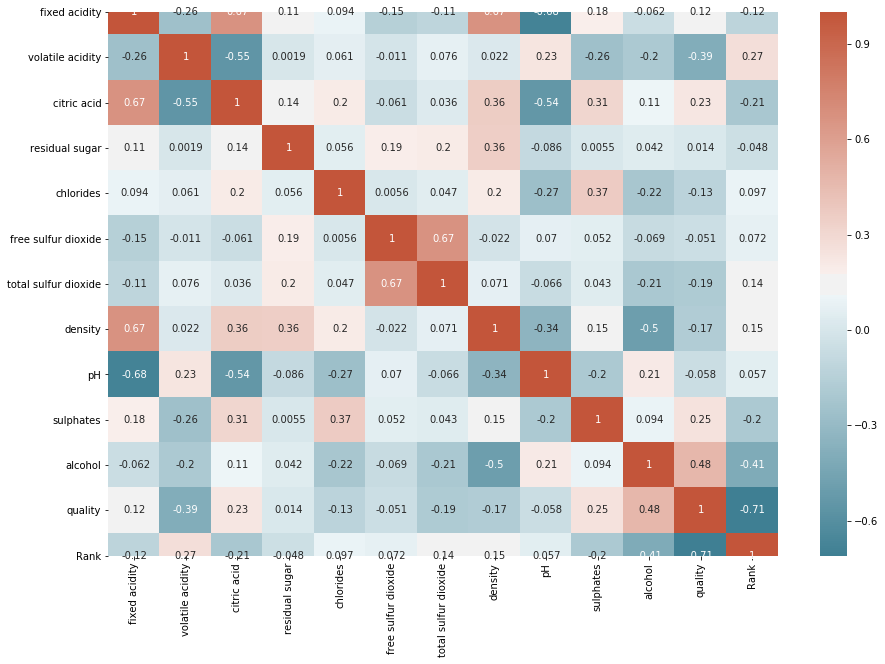

In [20]:
corr = df.corr()

plt.subplots(figsize=(15,10))

sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns, annot=True,
                cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Trying Different Models

## 1. KNN

Text(0.5, 1.0, 'Elbow plot')

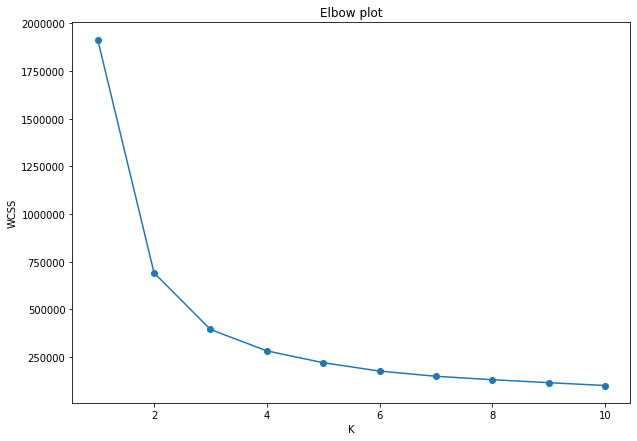

In [21]:
from sklearn.cluster import KMeans

wcss = []  # list of wcss of kmeans model from k 1 to 10
K = []  # list of k (number of clusters) of kmeans model from k 1 to 10

for k in range(0, 11):  
    try:
        kmeans = KMeans(n_clusters=k, init='k-means++') 
        kmeans.fit(X)  

        K.append(k)
        wcss.append(kmeans.inertia_)  # wcss value

    except OverflowError:  
        continue

plt.figure(figsize=(10, 7))  
        
plt.plot(K, wcss, marker='o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow plot')

In [22]:
from sklearn.neighbors import KNeighborsClassifier

classifier1 = KNeighborsClassifier(n_neighbors=3)
classifier1.fit(x_train, y_train)
predicted_values = classifier1.predict(x_test)

In [23]:
# Evaluation of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.895

Confusion Matrix: 
[[ 26  19]
 [ 23 332]]

              precision    recall  f1-score   support

           1       0.53      0.58      0.55        45
           2       0.95      0.94      0.94       355

    accuracy                           0.90       400
   macro avg       0.74      0.76      0.75       400
weighted avg       0.90      0.90      0.90       400



In [24]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)  

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 85.32 %
Standard Deviation: 2.16 %


## SVM

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
# <<-- Check the best SVM by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',  
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.24 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


In [27]:
# Make new SVM model with best parameters

classifier2 = SVC(C=1, gamma=0.9, kernel='rbf', random_state=0)
classifier2.fit(x_train, y_train)
predicted_values = classifier2.predict(x_test)

In [28]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.9225

Confusion Matrix: 
[[ 20  25]
 [  6 349]]

              precision    recall  f1-score   support

           1       0.77      0.44      0.56        45
           2       0.93      0.98      0.96       355

    accuracy                           0.92       400
   macro avg       0.85      0.71      0.76       400
weighted avg       0.91      0.92      0.91       400



In [29]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = x_train, y = y_train, cv = 10)  

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 89.25 %
Standard Deviation: 2.25 %


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [31]:
# <<-- Check the best Decision Tree by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['entropy', 'gini'], 'min_samples_split':[2, 4, 8]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.74 %
Best Parameters: {'criterion': 'gini', 'min_samples_split': 2}


In [32]:
# Make new DecisionTree model with best parameters

classifier3 = DecisionTreeClassifier(criterion='gini', min_samples_split=2,random_state=0)
classifier3.fit(x_train, y_train)
predicted_values = classifier3.predict(x_test)

In [33]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.905

Confusion Matrix: 
[[ 33  12]
 [ 26 329]]

              precision    recall  f1-score   support

           1       0.56      0.73      0.63        45
           2       0.96      0.93      0.95       355

    accuracy                           0.91       400
   macro avg       0.76      0.83      0.79       400
weighted avg       0.92      0.91      0.91       400



In [34]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 87.74 %
Standard Deviation: 1.46 %


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0) 
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
# <<-- Check the best Random Forest by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['entropy', 'gini'], 'min_samples_split':[2, 4, 8], 'n_estimators':[10, 15, 20, 25, 30]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.49 %
Best Parameters: {'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 20}


In [37]:
# Make new Random Forest model with best parameters

classifier4 = RandomForestClassifier(n_estimators=20, criterion='gini', min_samples_split=4,random_state=0) 
classifier4.fit(x_train, y_train)
predicted_values = classifier4.predict(x_test)

In [38]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.92

Confusion Matrix: 
[[ 24  21]
 [ 11 344]]

              precision    recall  f1-score   support

           1       0.69      0.53      0.60        45
           2       0.94      0.97      0.96       355

    accuracy                           0.92       400
   macro avg       0.81      0.75      0.78       400
weighted avg       0.91      0.92      0.92       400



In [39]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 90.50 %
Standard Deviation: 1.69 %


## AdaBoost 

In [40]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [41]:
# <<-- Check the best AdaBoost by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'algorithm':['SAMME.R', 'SAMME'], 'learning_rate':[0.7, 0.8, 0.9,1.0], 'n_estimators':[50, 60, 70]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.41 %
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 60}


In [42]:
# Make new AdaBoost model with best parameters

classifier5 = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.8, n_estimators=60)
classifier5.fit(x_train, y_train)
predicted_values = classifier5.predict(x_test)

In [43]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.8925

Confusion Matrix: 
[[ 25  20]
 [ 23 332]]

              precision    recall  f1-score   support

           1       0.52      0.56      0.54        45
           2       0.94      0.94      0.94       355

    accuracy                           0.89       400
   macro avg       0.73      0.75      0.74       400
weighted avg       0.90      0.89      0.89       400



In [44]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 87.41 %
Standard Deviation: 2.41 %


## Gradient Boost

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
# <<-- Check the best Gradient Boost by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['friedman_mse', 'mse'], 'learning_rate':[0.7, 0.8, 0.9, 1.0], 'n_estimators':[80, 100, 120, 130, 140]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.49 %
Best Parameters: {'criterion': 'mse', 'learning_rate': 0.9, 'n_estimators': 130}


In [47]:
# Make new Gradient Boost model with best parameters

classifier6 = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.9, n_estimators=130)
classifier6.fit(x_train, y_train)
predicted_values = classifier6.predict(x_test)

In [48]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.9125

Confusion Matrix: 
[[ 27  18]
 [ 17 338]]

              precision    recall  f1-score   support

           1       0.61      0.60      0.61        45
           2       0.95      0.95      0.95       355

    accuracy                           0.91       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.91      0.91      0.91       400



In [49]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier6, X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 89.25 %
Standard Deviation: 2.11 %


## XGBoost

In [50]:
!pip install xgboost

In [51]:
from xgboost import XGBClassifier

classifier7 = XGBClassifier()
classifier7.fit(x_train, y_train)
predicted_values = classifier7.predict(x_test)

In [52]:
# Evaluation of model

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.9175

Confusion Matrix: 
[[ 31  14]
 [ 19 336]]

              precision    recall  f1-score   support

           1       0.62      0.69      0.65        45
           2       0.96      0.95      0.95       355

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400



In [53]:
# <<--- K fold cross validation --->>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier7, X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 90.00 %
Standard Deviation: 2.29 %


# We select XGBoost and Random Forest as our best Classifiers.

## Important features in Random Forest and XGBoost.

In [54]:
feature_importances_RandomForsest = pd.Series(classifier4.feature_importances_, index=df.columns[:-2])
feature_importances_XGBoost = pd.Series(classifier7.feature_importances_, index=df.columns[:-2])

Text(0.5, 1.0, 'XGBoost')

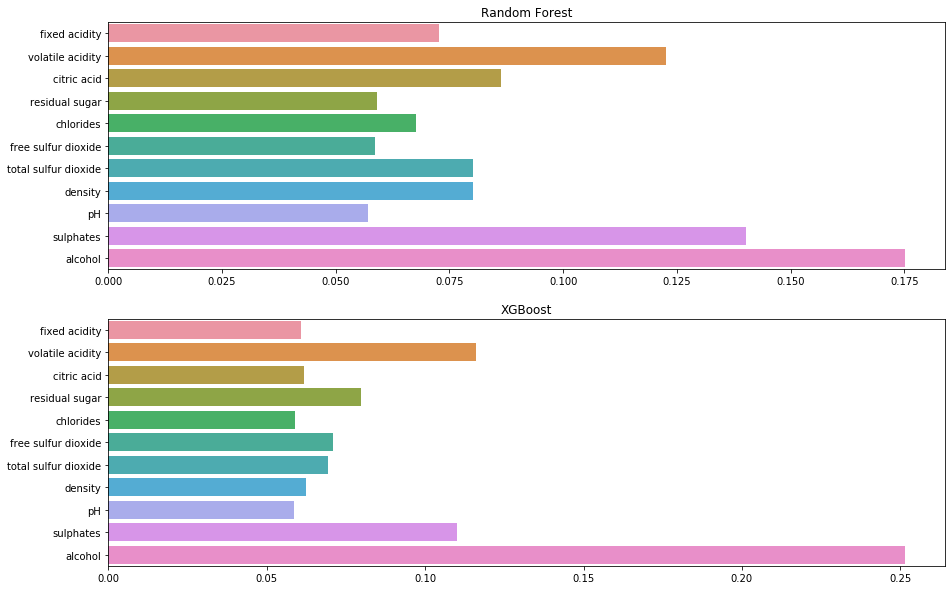

In [55]:
fig2, ax2 =plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Random Forest
sns.barplot(x=feature_importances_RandomForsest, y=feature_importances_RandomForsest.index, ax=ax2[0])
ax2[0].set_title('Random Forest')

# XGBoost
sns.barplot(x=feature_importances_XGBoost, y=feature_importances_XGBoost.index, ax=ax2[1])
ax2[1].set_title('XGBoost')

## You see Volatile acidity, alcohol and Sulphates are most important features.

# Save Model

In [56]:
# Save Random Forest Model

import pickle 

with open('Random_Forest_Model.txt','wb') as f:
    pickle.dump(classifier4, f)

In [57]:
# Save XGBoost Model

with open('XGBoost_Model.txt','wb') as f:
    pickle.dump(classifier7, f)